# Empirical Observations On Scaled Running Times

In the survey article [Route Planning in Transportation Networks](https://doi.org/10.1007/978-3-319-49487-6_2), a [methodology](https://i11www.iti.kit.edu/~pajor/survey/) for scaling running times from different machines is proposed to make them comparable.
The methodology is based on a benchmark score for each machine, measuring the running time of a few one-to-all searches with Dijkstra's algorithm.
However, Dijkstra's algorithm on road networks is primarily bottlenecked by memory bandwidth.
In contrast, the speedup techniques considered in the article are often much more sensitive to CPU frequency, cache performance and other features of modern hardware.
Here, we try to gather some empirical evidence on the quality of the predictions made by these benchmark scores.
We compare benchmark scores with average running times of one million random CH queries on DIMACS Europe with the implementation of [RoutingKit](https://github.com/RoutingKit/RoutingKit) on all machines of the KIT-Algo group.
This notebook contains the raw results and some visualizations comparing the observed performance to predictions made by the proposed scaling methodology.

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

The following table contains the raw observations. The Dijkstra column contains the benchmark score in milliseconds, CH the average CH query running time in microseconds.

In [2]:
data = pd.read_csv('scaling.csv')
data

,machine,Dijkstra,CH
0,compute1,69621.1,226
1,compute3,32669.5,91
2,compute4,34789.8,86
3,compute6,35208.0,110
4,compute8,116318.0,429
5,compute10,64806.3,249
6,compute11,39028.7,104
7,gpute1,33584.3,97
8,phipute1,37360.8,101


The following figure contains all measurements as datapoints. The line indicates the running time as predicted by the scaling methodology based on the performance of our machine with the fastest Dijkstra score.

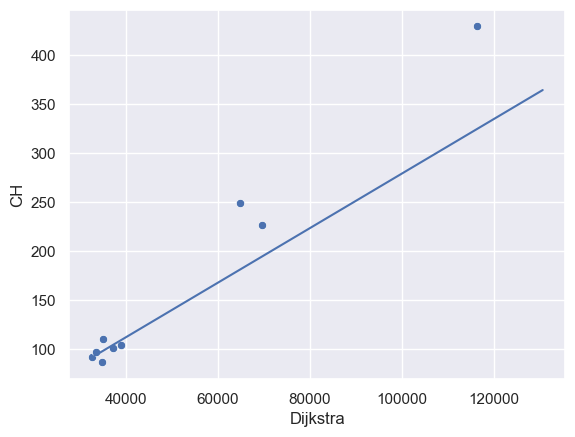

In [3]:
sns.scatterplot(data=data, x='Dijkstra', y='CH')
plt.plot([32669.5, 32669.5 * 4], [91, 91 * 4])

The following figure contains the measurements only for the faster machines. The line indicates the running time as predicted by the scaling methodology based on the performance of our machine with the fastest Dijkstra score.

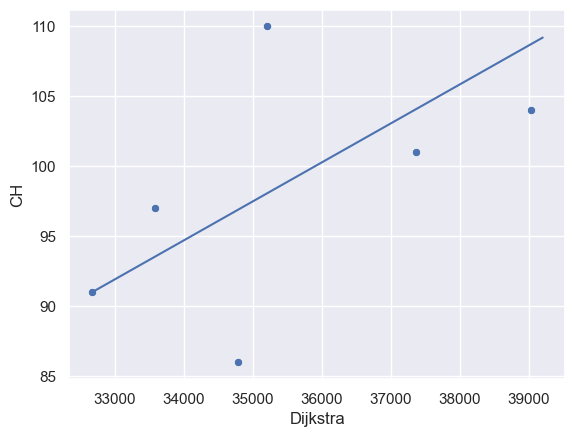

In [4]:
sns.scatterplot(data=data.query('Dijkstra < 40000'), x='Dijkstra', y='CH')
plt.plot([32669.5, 32669.5 * 1.2], [91, 91 * 1.2])